#import some usefull library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the data after uploading the csv file

In [ ]:
df = pd.read_csv("/content/qura_question_pair.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.shape

(404290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

#Here we check the number of duplicate and non duplicate  question pairs  [1<-duplicate, 0<-non duplicate ]

#Data Frame partition
we devied the data frame into two part according to the duplicate question pairs and non duplicate question pairs.After that we take 20000 data from duplicate data frame and 20000 data from non duplicate data frame .Next step we concat them and suffle all data according to the row.

In [ ]:
df_0 = df[df['is_duplicate'] == 0]
df_1 = df[df['is_duplicate'] == 1]
print("Shape of non duplicate data frame ",df_0.shape )
print("Shape of duplicate data frame ",df_1.shape )

Shape of non duplicate data frame  (255027, 6)
Shape of duplicate data frame  (149263, 6)


In [ ]:
df_0 = df_0.sample(20000)
df_1 = df_1.sample(20000)

new_df = pd.concat([df_0, df_1], axis=0)
# Shuffle the DataFrame
new_df = new_df.sample(frac=1).reset_index(drop=True)

new_df.shape

(40000, 6)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,80101,136244,136245,"Where can I find some good, advanced JFreeChar...",What data visualization add-ins are good to us...,0
1,117198,190750,190751,Which graphic card is better: GeForce NVidia 9...,How do I make the most of an NVIDIA® GeForce® ...,0
2,138085,219959,219960,"When there is market disequilibrium, what are ...",What is a market disequilibrium and how does i...,1
3,366082,496233,496234,What was your reaction when you came to know t...,What was your reaction when your wife told you...,1
4,394858,95484,5863,Which are the most underrated movies in Bollyw...,What are most underrated Bollywood movies?,1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            40000 non-null  int64 
 1   qid1          40000 non-null  int64 
 2   qid2          40000 non-null  int64 
 3   question1     40000 non-null  object
 4   question2     40000 non-null  object
 5   is_duplicate  40000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.8+ MB


In [ ]:
#We take only two question pairs
q_df = new_df[['question1','question2']]
q_df.shape

(40000, 2)

In [ ]:
q_df.head()

,question1,question2
0,"Where can I find some good, advanced JFreeChar...",What data visualization add-ins are good to us...
1,Which graphic card is better: GeForce NVidia 9...,How do I make the most of an NVIDIA® GeForce® ...
2,"When there is market disequilibrium, what are ...",What is a market disequilibrium and how does i...
3,What was your reaction when you came to know t...,What was your reaction when your wife told you...
4,Which are the most underrated movies in Bollyw...,What are most underrated Bollywood movies?


#Feature Extracting
1. **q1_length** = numbers of character in question_1
2. **q2_length** = numbers of character in question_2
3. **q1_num_word** = numbers of word in question_1
4. **q2_num_word** = numbers of word in question_2
5. **common_words**	= numbers of common words between q1 and q2
6. **total_length**	= (q1_num_word +q2_num_word )
7. **word_share** = common_words / total_length

In [ ]:
new_df['q1_length'] = new_df['question1'].str.len()
new_df['q2_length'] = new_df['question2'].str.len()
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
0,80101,136244,136245,"Where can I find some good, advanced JFreeChar...",What data visualization add-ins are good to us...,0,80,59
1,117198,190750,190751,Which graphic card is better: GeForce NVidia 9...,How do I make the most of an NVIDIA® GeForce® ...,0,82,71
2,138085,219959,219960,"When there is market disequilibrium, what are ...",What is a market disequilibrium and how does i...,1,76,55
3,366082,496233,496234,What was your reaction when you came to know t...,What was your reaction when your wife told you...,1,85,64
4,394858,95484,5863,Which are the most underrated movies in Bollyw...,What are most underrated Bollywood movies?,1,50,42


In [ ]:
new_df['q1_num_word'] = new_df['question1'].apply(lambda row : len(row.split(' ')))
new_df['q2_num_word'] = new_df['question2'].apply(lambda row : len(row.split(' ')))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word
0,80101,136244,136245,"Where can I find some good, advanced JFreeChar...",What data visualization add-ins are good to us...,0,80,59,12,10
1,117198,190750,190751,Which graphic card is better: GeForce NVidia 9...,How do I make the most of an NVIDIA® GeForce® ...,0,82,71,16,14
2,138085,219959,219960,"When there is market disequilibrium, what are ...",What is a market disequilibrium and how does i...,1,76,55,12,10
3,366082,496233,496234,What was your reaction when you came to know t...,What was your reaction when your wife told you...,1,85,64,15,12
4,394858,95484,5863,Which are the most underrated movies in Bollyw...,What are most underrated Bollywood movies?,1,50,42,8,6


In [ ]:
def common_word(row) :
 w1= set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
 w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
 common_w = len(w1 & w2)
 return common_w

In [ ]:
new_df['common_words'] = new_df.apply(common_word, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words
0,80101,136244,136245,"Where can I find some good, advanced JFreeChar...",What data visualization add-ins are good to us...,0,80,59,12,10,1
1,117198,190750,190751,Which graphic card is better: GeForce NVidia 9...,How do I make the most of an NVIDIA® GeForce® ...,0,82,71,16,14,0
2,138085,219959,219960,"When there is market disequilibrium, what are ...",What is a market disequilibrium and how does i...,1,76,55,12,10,4
3,366082,496233,496234,What was your reaction when you came to know t...,What was your reaction when your wife told you...,1,85,64,15,12,8
4,394858,95484,5863,Which are the most underrated movies in Bollyw...,What are most underrated Bollywood movies?,1,50,42,8,6,3


In [ ]:
def total_length(row) :
 w1= set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
 w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
 return (len(w1) +len(w2))

In [ ]:
new_df['total_length'] = new_df.apply(total_length, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length
0,80101,136244,136245,"Where can I find some good, advanced JFreeChar...",What data visualization add-ins are good to us...,0,80,59,12,10,1,22
1,117198,190750,190751,Which graphic card is better: GeForce NVidia 9...,How do I make the most of an NVIDIA® GeForce® ...,0,82,71,16,14,0,30
2,138085,219959,219960,"When there is market disequilibrium, what are ...",What is a market disequilibrium and how does i...,1,76,55,12,10,4,22
3,366082,496233,496234,What was your reaction when you came to know t...,What was your reaction when your wife told you...,1,85,64,15,12,8,23
4,394858,95484,5863,Which are the most underrated movies in Bollyw...,What are most underrated Bollywood movies?,1,50,42,8,6,3,14


In [ ]:
new_df['word_share'] = round(new_df['common_words']/new_df['total_length'],3)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length,word_share
0,80101,136244,136245,"Where can I find some good, advanced JFreeChar...",What data visualization add-ins are good to us...,0,80,59,12,10,1,22,0.045
1,117198,190750,190751,Which graphic card is better: GeForce NVidia 9...,How do I make the most of an NVIDIA® GeForce® ...,0,82,71,16,14,0,30,0.000
2,138085,219959,219960,"When there is market disequilibrium, what are ...",What is a market disequilibrium and how does i...,1,76,55,12,10,4,22,0.182
3,366082,496233,496234,What was your reaction when you came to know t...,What was your reaction when your wife told you...,1,85,64,15,12,8,23,0.348
4,394858,95484,5863,Which are the most underrated movies in Bollyw...,What are most underrated Bollywood movies?,1,50,42,8,6,3,14,0.214


#Now we pre-process our data and extract some advanced Features

#advanced Feature

Advanced Features

1.**Token Features**

cwc_min: This is the ratio of the number of common words to the length of the smaller question

cwc_max: This is the ratio of the number of common words to the length of the larger question

csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions

csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions

ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions

ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions

last_word_eq: 1 if the last word in the two questions is same, 0 otherwise

first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

2.**Length Based Features**

mean_len: Mean of the length of the two questions (number of words)

abs_len_diff: Absolute difference between the length of the two questions (number of words)

longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
3. **Fuzzy Features**

fuzz_ratio: fuzz_ratio score from fuzzywuzzy

fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy

token_sort_ratio: token_sort_ratio from fuzzywuzzy

token_set_ratio: token_set_ratio from fuzzywuzzy

In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [ ]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

<ipython-input-20-da7cec07d695>:161: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)
<ipython-input-20-da7cec07d695>:164: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)
<ipython-input-20-da7cec07d695>:161: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)
<ipython-input-20-da7cec07d695>:164: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length,word_share
0,80101,136244,136245,where can i find some good advanced jfreechar...,what data visualization add ins are good to us...,0,80,59,12,10,1,22,0.045
1,117198,190750,190751,which graphic card is better geforce nvidia 9...,how do i make the most of an nvidia geforce ...,0,82,71,16,14,0,30,0.000
2,138085,219959,219960,when there is market disequilibrium what are ...,what is a market disequilibrium and how does i...,1,76,55,12,10,4,22,0.182
3,366082,496233,496234,what was your reaction when you came to know t...,what was your reaction when your wife told you...,1,85,64,15,12,8,23,0.348
4,394858,95484,5863,which are the most underrated movies in bollywood,what are most underrated bollywood movies,1,50,42,8,6,3,14,0.214


#Fetch token features

In [ ]:
# Advanced Features
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Add token featrues to the data frame

In [ ]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,...,total_length,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,80101,136244,136245,where can i find some good advanced jfreechar...,what data visualization add ins are good to us...,0,80,59,12,10,...,22,0.045,0.428565,0.428565,0.000000,0.000000,0.272725,0.249998,0,0
1,117198,190750,190751,which graphic card is better geforce nvidia 9...,how do i make the most of an nvidia geforce ...,0,82,71,16,14,...,30,0.000,0.428565,0.230767,0.000000,0.000000,0.214284,0.176470,0,0
2,138085,219959,219960,when there is market disequilibrium what are ...,what is a market disequilibrium and how does i...,1,76,55,12,10,...,22,0.182,0.999967,0.599988,0.285710,0.285710,0.499995,0.416663,1,0
3,366082,496233,496234,what was your reaction when you came to know t...,what was your reaction when your wife told you...,1,85,64,15,12,...,23,0.348,0.749981,0.499992,0.833319,0.714276,0.666661,0.533330,1,1
4,394858,95484,5863,which are the most underrated movies in bollywood,what are most underrated bollywood movies,1,50,42,8,6,...,14,0.214,0.999967,0.999967,0.666644,0.399992,0.833319,0.624992,0,0


In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=2ac6c386efb9d0824a76ee10793637da0f49fc3396f77154355741c71e92b342
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


#Fetch length feature from data frame

In [ ]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0  # or any appropriate default value

    return length_features

#add length feature into the data frame

In [ ]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,80101,136244,136245,where can i find some good advanced jfreechar...,what data visualization add ins are good to us...,0,80,59,12,10,...,0.428565,0.000000,0.000000,0.272725,0.249998,0,0,1,11.5,0.322034
1,117198,190750,190751,which graphic card is better geforce nvidia 9...,how do i make the most of an nvidia geforce ...,0,82,71,16,14,...,0.230767,0.000000,0.000000,0.214284,0.176470,0,0,3,15.5,0.140845
2,138085,219959,219960,when there is market disequilibrium what are ...,what is a market disequilibrium and how does i...,1,76,55,12,10,...,0.599988,0.285710,0.285710,0.499995,0.416663,1,0,2,11.0,0.418182
3,366082,496233,496234,what was your reaction when you came to know t...,what was your reaction when your wife told you...,1,85,64,15,12,...,0.499992,0.833319,0.714276,0.666661,0.533330,1,1,3,13.5,0.484375
4,394858,95484,5863,which are the most underrated movies in bollywood,what are most underrated bollywood movies,1,50,42,8,6,...,0.999967,0.666644,0.399992,0.833319,0.624992,0,0,2,7.0,0.428571


In [ ]:
!pip install fuzzywuzzy

#Fetch fuzzy feature from data frame

In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#Add Fuzzy feature into the data frame

In [ ]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
fuzzy_features.shape

(40000,)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,80101,136244,136245,where can i find some good advanced jfreechar...,what data visualization add ins are good to us...,0,80,59,12,10,...,0.249998,0,0,1,11.5,0.322034,34,47,63,60
1,117198,190750,190751,which graphic card is better geforce nvidia 9...,how do i make the most of an nvidia geforce ...,0,82,71,16,14,...,0.176470,0,0,3,15.5,0.140845,37,44,58,58
2,138085,219959,219960,when there is market disequilibrium what are ...,what is a market disequilibrium and how does i...,1,76,55,12,10,...,0.416663,1,0,2,11.0,0.418182,64,63,64,80
3,366082,496233,496234,what was your reaction when you came to know t...,what was your reaction when your wife told you...,1,85,64,15,12,...,0.533330,1,1,3,13.5,0.484375,72,63,81,91
4,394858,95484,5863,which are the most underrated movies in bollywood,what are most underrated bollywood movies,1,50,42,8,6,...,0.624992,0,0,2,7.0,0.428571,71,71,87,94


#Perform EDA

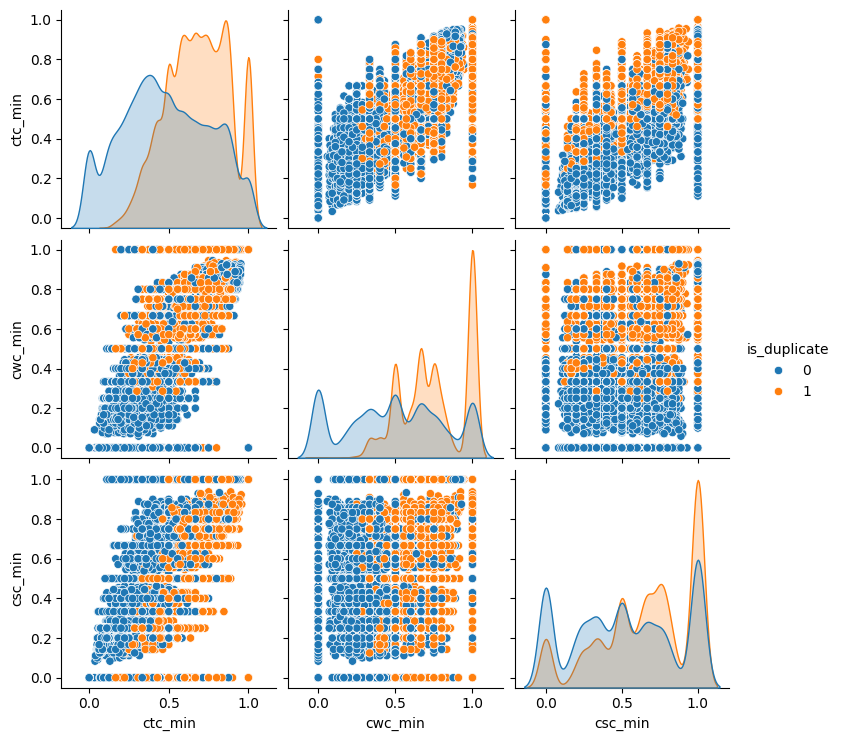

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')
plt.show()

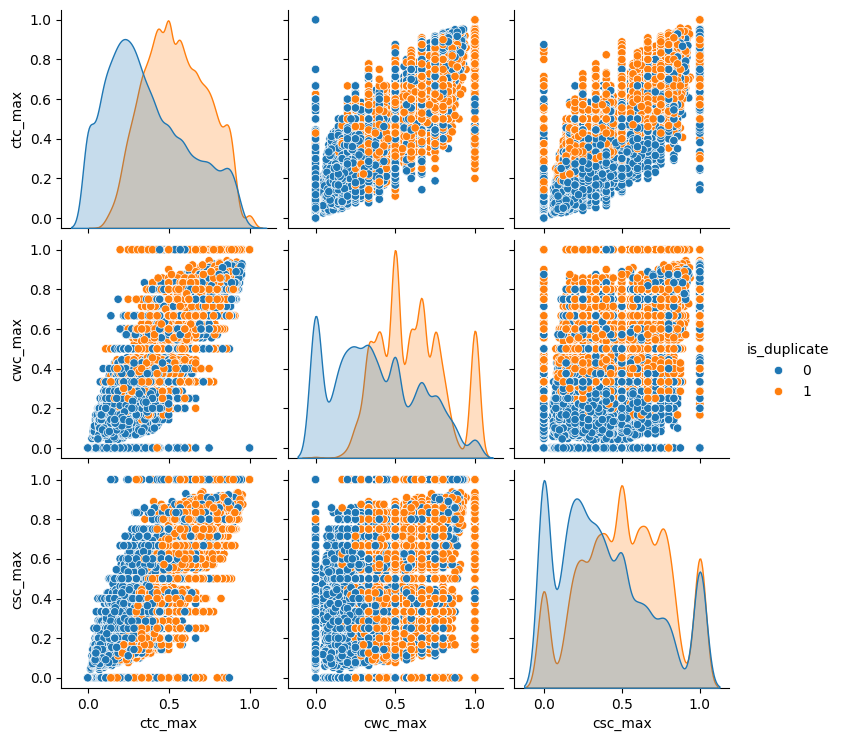

In [91]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')
plt.show()

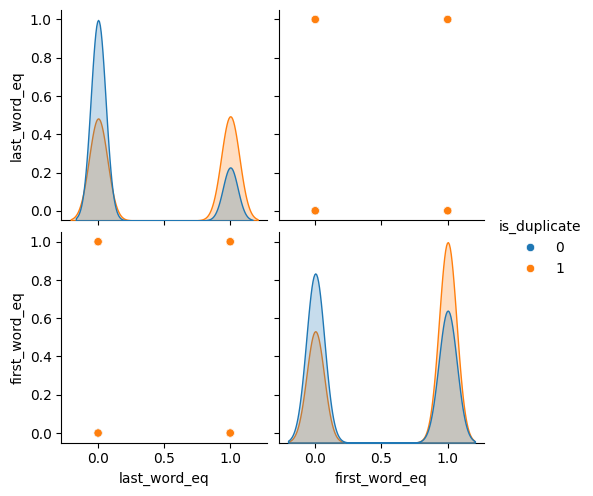

In [92]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')
plt.show()

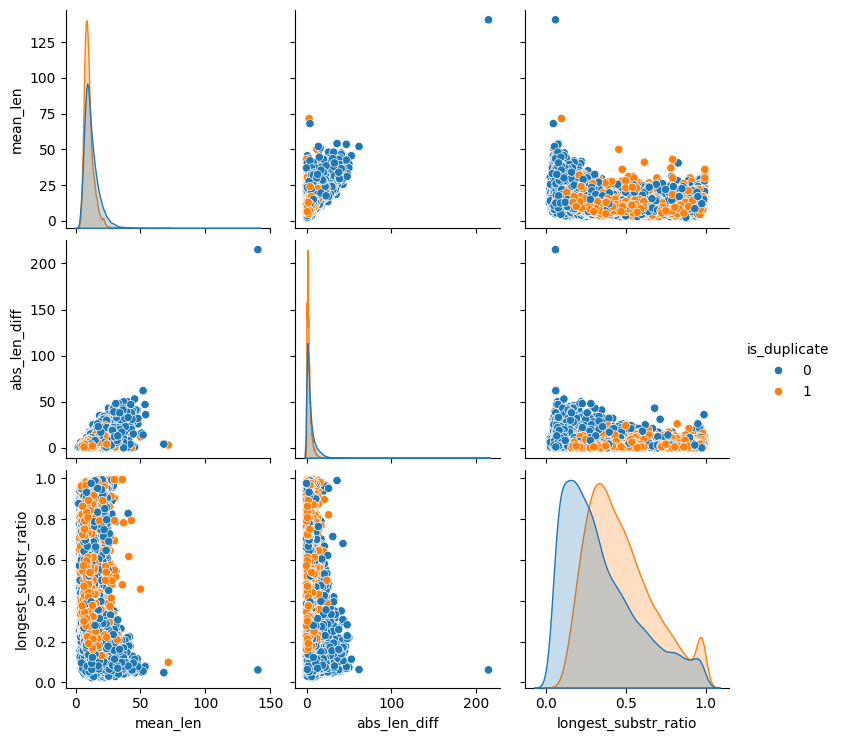

In [93]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

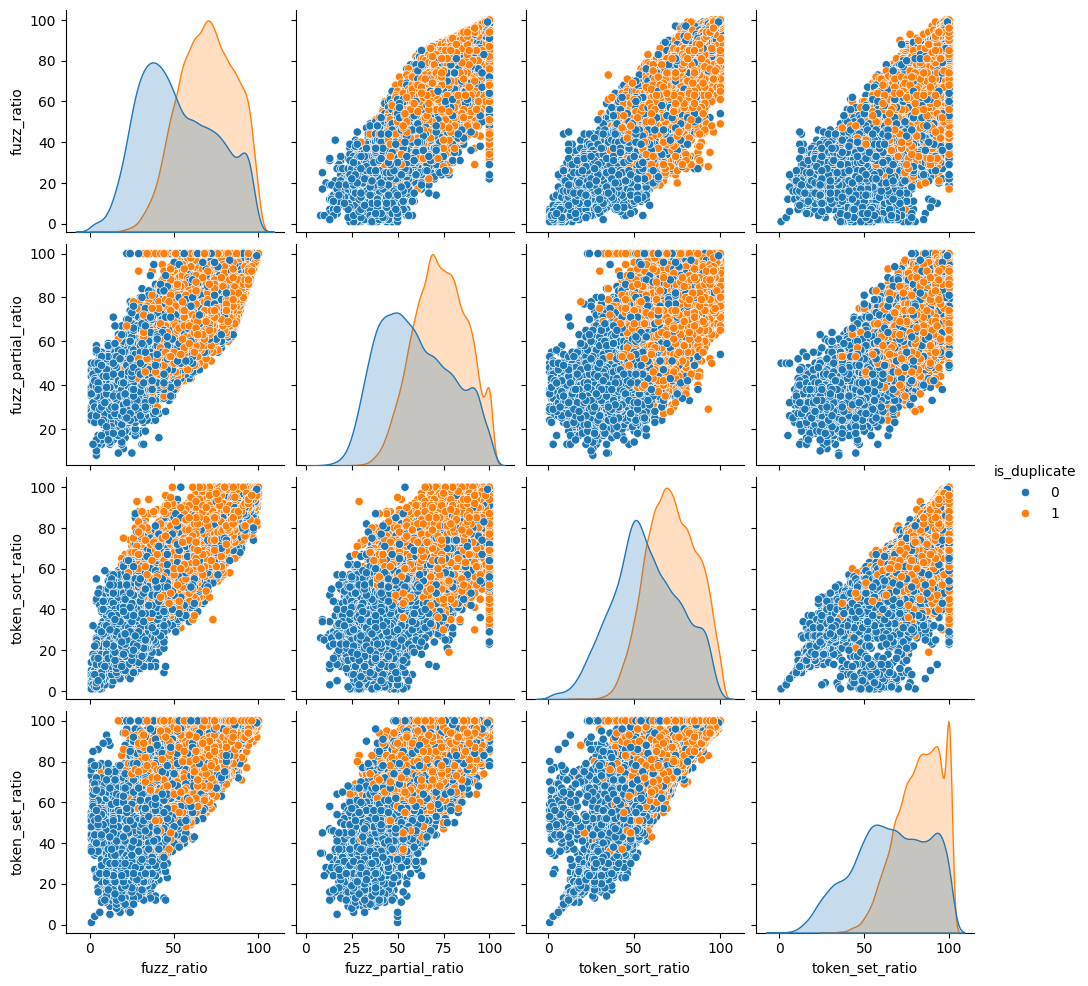

In [94]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

#TSNE

In [95]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [96]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.109s...
[t-SNE] Computed neighbors for 40000 samples in 12.869s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sa

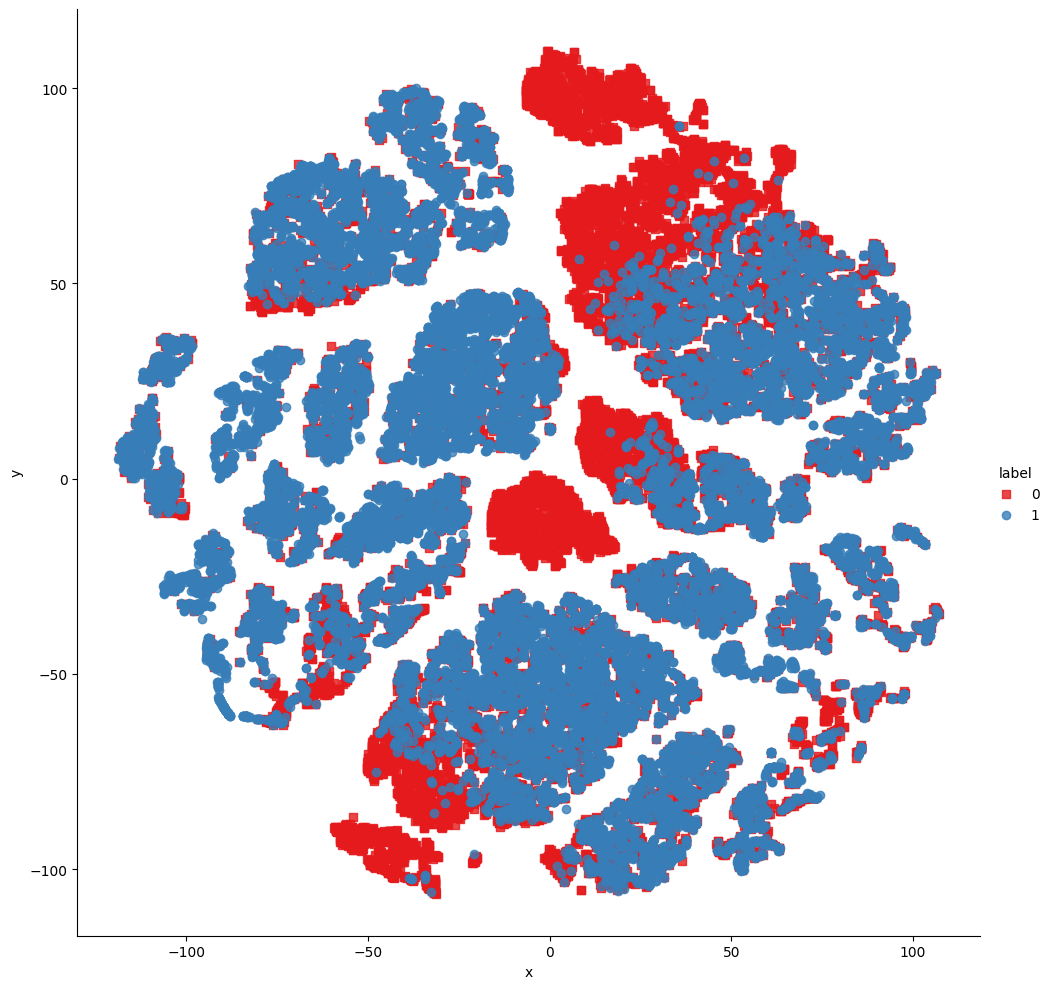

In [97]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'],height = 10)

#Download new_df

In [ ]:
import pandas as pd

# Assuming your DataFrame is named new_df
new_df.to_csv('/content/preprocessed_data.csv', index=False)

#Apply Bag of words on question1 and question2

In [ ]:
q_df = new_df[['question1','question2']]
q_df.shape

(40000, 2)

In [ ]:
#drop some column
new_df_2 = new_df.drop(columns=['id',	'qid1',	'qid2',	'question1',	'question2'])
new_df_2.head()

,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,80,59,12,10,1,22,0.045,0.428565,0.428565,...,0.249998,0,0,1,11.5,0.322034,34,47,63,60
1,0,82,71,16,14,0,30,0.000,0.428565,0.230767,...,0.176470,0,0,3,15.5,0.140845,37,44,58,58
2,1,76,55,12,10,4,22,0.182,0.999967,0.599988,...,0.416663,1,0,2,11.0,0.418182,64,63,64,80
3,1,85,64,15,12,8,23,0.348,0.749981,0.499992,...,0.533330,1,1,3,13.5,0.484375,72,63,81,91
4,1,50,42,8,6,3,14,0.214,0.999967,0.999967,...,0.624992,0,0,2,7.0,0.428571,71,71,87,94


In [ ]:
#Apply countvectorizer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
#merge questions

questions =  list(q_df['question1']) + list(q_df['question2'])
print("Length of questions    ",len(questions))

cv = CountVectorizer(max_features= 500)
q1,q2 = np.vsplit(cv.fit_transform(questions).toarray(),2)

Length of questions     80000


In [ ]:
#temp1_df contains the data frame after apply countvectorizer on q1
#temp2_df contains the data frame after apply countvectorizer on q2
#temp_df contains the data frame after apply countvectorizer on both q1 and q2 and also conctenate row-wise
temp1_df = pd.DataFrame(q1, index=q_df.index)
temp2_df = pd.DataFrame(q2, index=q_df.index)

temp_df = pd.concat([temp1_df,temp2_df], axis = 1)
temp_df.shape

(40000, 1000)

In [ ]:
#final_df contains the data after concatination 23- new feature extraction and vector from countvectorizer
final_df = pd.concat([new_df_2, temp_df], axis = 1)
final_df.shape

(40000, 1023)

In [ ]:
final_df.head()

,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length,word_share,cwc_min,cwc_max,...,490,491,492,493,494,495,496,497,498,499
0,0,80,59,12,10,1,22,0.045,0.428565,0.428565,...,0,0,0,0,0,0,0,0,0,0
1,0,82,71,16,14,0,30,0.000,0.428565,0.230767,...,0,0,0,0,0,0,0,0,0,0
2,1,76,55,12,10,4,22,0.182,0.999967,0.599988,...,0,0,0,0,0,0,0,0,0,0
3,1,85,64,15,12,8,23,0.348,0.749981,0.499992,...,0,0,0,0,0,0,0,1,2,0
4,1,50,42,8,6,3,14,0.214,0.999967,0.999967,...,0,0,0,0,0,0,0,0,0,0


#Apply RandomForest Classifier

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values,
                                                    final_df.iloc[:,0].values,
                                                    test_size= 0.2,
                                                    random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#apply RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.802125

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for RandomForest:")
print(classification_report(y_test, y_pred))

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      3969
           1       0.76      0.88      0.82      4031

    accuracy                           0.80      8000
   macro avg       0.81      0.80      0.80      8000
weighted avg       0.81      0.80      0.80      8000



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[2853, 1116],
       [ 467, 3564]])

#Apply XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test,y_pred1)
print(f"Accuracy: {accuracy}")

Accuracy: 0.809125


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred1)

array([[2912, 1057],
       [ 470, 3561]])

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for RandomForest:")
print(classification_report(y_test, y_pred1))

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      3969
           1       0.77      0.88      0.82      4031

    accuracy                           0.81      8000
   macro avg       0.82      0.81      0.81      8000
weighted avg       0.82      0.81      0.81      8000



#Apply Grid Search Cv

In [ ]:
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini',
                                              max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                              min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,
                                              min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None,
                                              random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
                                              max_samples=None, monotonic_cst=None)

In [ ]:
# Define the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [30,None],
    'criterion' :['gini','entropy'],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
    #'bootstrap': [True, False]
}


In [ ]:
# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [ ]:
# Get the best parameters
from sklearn.metrics import accuracy_score, classification_report
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.801375
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      3969
           1       0.76      0.88      0.82      4031

    accuracy                           0.80      8000
   macro avg       0.81      0.80      0.80      8000
weighted avg       0.81      0.80      0.80      8000



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[2846, 1123],
       [ 466, 3565]])

In [ ]:
#roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8007265623891535

#Apply TfIdf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)

q1,q2 = np.vsplit(tfidf.fit_transform(questions).toarray(),2)

temp1_df = pd.DataFrame(q1, index=q_df.index)
temp2_df = pd.DataFrame(q2, index=q_df.index)

temp_df = pd.concat([temp1_df,temp2_df], axis = 1)
temp_df.shape

(40000, 1000)

In [ ]:
#final_df contains the data after concatination 23- new feature extraction and vector from countvectorizer
final_df = pd.concat([new_df_2, temp_df], axis = 1)
final_df.shape

(40000, 1023)

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values,
                                                    final_df.iloc[:, 0].values,
                                                    test_size= 0.2,
                                                    random_state=42)

In [ ]:
#apply RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)
y_pred_2 = rf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_2)
print("Accuracy Score of RandomForest when using TfIdf   ",accuracy)

Accuracy Score of RandomForest when using TfIdf    0.802


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion matrix for RandomForestClassification when using TfIdf")
confusion_matrix(y_test,y_pred_2)

Confusion matrix for RandomForestClassification when using TfIdf


array([[2854, 1115],
       [ 469, 3562]])

In [ ]:
print("Classification Report for RandomForestClassification when using TfIdf:")
print(classification_report(y_test, y_pred_2))

Classification Report for RandomForestClassification when using TfIdf:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      3969
           1       0.76      0.88      0.82      4031

    accuracy                           0.80      8000
   macro avg       0.81      0.80      0.80      8000
weighted avg       0.81      0.80      0.80      8000



In [ ]:
import pickle

#pickle.dump(best_rf,open('best_model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [ ]:
import pickle

pickle.dump(best_rf,open('best_model.pkl','wb'))

#Enter two question then we say that this two question are duplicate or not

In [ ]:
! pip install distance fuzzywuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=8d4d00f33d0d874c4d164ff66b6a77e5384af90e04bc4504c84271f8a364897c
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords (you only need to do this once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
from bs4 import BeautifulSoup
import distance
from fuzzywuzzy import fuzz
import pickle
import numpy as np
import sklearn
cv = pickle.load(open('cv.pkl', 'rb'))



def test_common_words(q1, q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

def test_total_words(q1, q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))


def test_fetch_token_features(q1, q2):
    SAFE_DIV = 0.0001

    STOP_WORDS = pickle.load(open('stopwords.pkl', 'rb'))

    token_features = [0.0] * 8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    # Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


def test_fetch_length_features(q1, q2):
    length_features = [0.0] * 3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


def test_fetch_fuzzy_features(q1, q2):
    fuzzy_features = [0.0] * 4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


def preprocess(q):
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\\W')
    q = re.sub(pattern, ' ', q).strip()

    return q


def query_point_creator(q1, q2):
    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features

    # length of the q1 and q2
    input_query.append(len(q1))
    input_query.append(len(q2))

    # number of words in q1 and q2
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    # common words between q1 and q2
    input_query.append(test_common_words(q1, q2))

    # total words of q1 and q2
    input_query.append(test_total_words(q1, q2))

    # word share
    input_query.append(round(test_common_words(q1, q2) / test_total_words(q1, q2), 2))

    # fetch token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1, 22), q1_bow, q2_bow))

In [ ]:
q1 =' what is the name of capital of india '
q2 = 'where is the indian capital'

In [ ]:
model = pickle.load(open('best_model.pkl', 'rb'))
query = query_point_creator(q1,q2)
result = model.predict(query)[0]

if result:
        print('Duplicate')
else:
        print('Not Duplicate')

Duplicate


#Voting Algorithm

In [121]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()
clf2 = XGBClassifier()
clf3 = RandomForestClassifier(criterion = 'entropy', min_samples_split = 5)
estimators=[('RFC', clf1), ('XGB', clf2), ('RFC2',clf3)]

VC = VotingClassifier(estimators=estimators, voting='soft')

In [122]:
VC.fit(X_train,y_train)

VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [123]:
y_pred_2 = VC.predict(X_test)
accuracy_score(y_test,y_pred_2)

0.81175

In [124]:
print("Classification Report for voting algorithm:")
print(classification_report(y_test, y_pred_2))

Classification Report for voting algorithm:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      3969
           1       0.77      0.90      0.83      4031

    accuracy                           0.81      8000
   macro avg       0.82      0.81      0.81      8000
weighted avg       0.82      0.81      0.81      8000



#Results
1. **Results for advance feature Extraction and apply Bag of words**

**Best parameters**: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.801375

**Classification Report**:

               precision    recall  f1-score   support

           0       0.86      0.72      0.78      3969
           1       0.76      0.88      0.82      4031

    accuracy                           0.80      8000
    macro avg       0.81      0.80     0.80      8000
    weighted avg       0.81   0.80     0.80      8000


2. **Results for advance feature Extracting and apply TFIDF**

Classification Report for RandomForestClassification when using TfIdf:

               precision    recall  f1-score   support

           0       0.86      0.72      0.78      3969
           1       0.76      0.88      0.82      4031

    accuracy                           0.80      8000
    macro avg       0.81      0.80     0.80      8000
    weighted avg    0.81      0.80     0.80      8000

3. **Classification Report for Voting Algorithm :**

              
                 precision    recall  f1-score   support

           0        0.87      0.73      0.79      3969
           1        0.77      0.90      0.83      4031

    accuracy                            0.81      8000
    macro avg       0.82      0.81      0.81      8000
    weighted avg    0.82      0.81      0.81      8000